In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [20]:
DATA_PATH = "Color/"

In [21]:
train_datagen = ImageDataGenerator( # https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
    rescale = 1./255,
    rotation_range=5,
    shear_range = 0.1, 
    zoom_range = 0.1,
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(
   rescale = 1./255 
)

In [22]:
train_data = train_datagen.flow_from_directory(
  DATA_PATH+'train/',
  target_size = (224, 224),
  color_mode = 'rgb',
  #classes = ['Female', 'Male'],
  class_mode = 'categorical',
  batch_size = 2,
  shuffle = True
)

test_data = test_datagen.flow_from_directory(
  DATA_PATH+'val/',
  target_size = (224, 224),
  color_mode = 'rgb',
  #classes = ['Female', 'Male'],
  class_mode = 'categorical',
  batch_size = 2,
)

Found 319 images belonging to 10 classes.
Found 110 images belonging to 10 classes.


In [23]:
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(3,3),  input_shape=(224,224,3),
                  activation='relu')) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(32, activation='relu', kernel_size=(3,3))) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))


model1.add(Conv2D(32, activation='relu', kernel_size=(3,3))) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(128, activation='relu', kernel_size=(3,3))) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Conv2D(64, activation='relu', kernel_size=(3,3))) #64 neurons with 3x3 filter
#this class allows create CNN to extract feature
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Flatten()) #converts multi dimensional to 1D channel
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 32)      

In [24]:
# Model Callback - Stop the training when no learning is taking place
early_stop = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stop]

In [25]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = model1.fit(
    train_data,
    # Number of batches for training
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    # Number of batches for testing
    validation_steps = len(test_data),
    epochs = 20,
    callbacks = callbacks_list,
)

Epoch 1/20
160/160 [==============================] - 21s 130ms/step - loss: 2.0851 - accuracy: 0.2476 - val_loss: 1.9456 - val_accuracy: 0.3364
Epoch 2/20
160/160 [==============================] - 20s 127ms/step - loss: 1.4663 - accuracy: 0.4326 - val_loss: 1.4986 - val_accuracy: 0.4636
Epoch 3/20
160/160 [==============================] - 21s 133ms/step - loss: 1.3479 - accuracy: 0.5141 - val_loss: 1.3087 - val_accuracy: 0.4091
Epoch 4/20
160/160 [==============================] - 21s 133ms/step - loss: 1.2623 - accuracy: 0.5643 - val_loss: 0.7002 - val_accuracy: 0.8000
Epoch 5/20
160/160 [==============================] - 21s 128ms/step - loss: 0.9886 - accuracy: 0.6583 - val_loss: 0.9260 - val_accuracy: 0.5636
Epoch 6/20
160/160 [==============================] - 21s 128ms/step - loss: 0.8319 - accuracy: 0.7273 - val_loss: 0.4925 - val_accuracy: 0.9182
Epoch 7/20
160/160 [==============================] - 20s 127ms/step - loss: 0.7402 - accuracy: 0.7618 - val_loss: 0.5328 - val_ac

In [47]:
model1.save('color_model.h5')

In [48]:
print("[INFO] accuracies....")  
# Train accuracy
scores = model1.evaluate(train_data, steps=len(train_data), verbose=1)
print("Train Accuracy: %.2f%%" % (scores[1]*100))

# Test accuracy
scores = model1.evaluate(test_data, steps=len(test_data), verbose=1)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[INFO] accuracies....
160/160 [==============================] - 7s 46ms/step - loss: 0.5130 - accuracy: 0.8056
Train Accuracy: 80.56%
55/55 [==============================] - 2s 28ms/step - loss: 0.4450 - accuracy: 0.8909
Test Accuracy: 89.09%


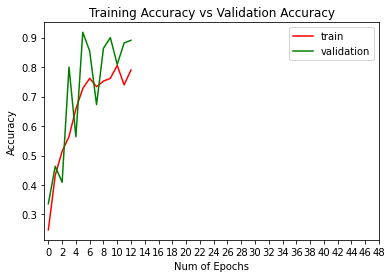

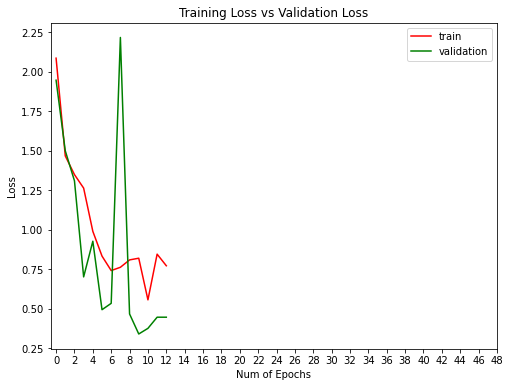

In [49]:
import numpy as np
plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0,50, 2))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

[INFO] evaluating the model...
              precision    recall  f1-score   support

       black       0.12      0.13      0.13        15
        blue       0.08      0.09      0.09        11
       brown       0.00      0.00      0.00        12
       green       0.33      0.11      0.17         9
        grey       0.00      0.00      0.00         5
      orange       0.08      0.09      0.08        11
         red       0.17      0.17      0.17        12
      violet       0.18      0.18      0.18        11
       white       0.00      0.00      0.00        13
      yellow       0.17      0.18      0.17        11

    accuracy                           0.10       110
   macro avg       0.11      0.10      0.10       110
weighted avg       0.11      0.10      0.10       110



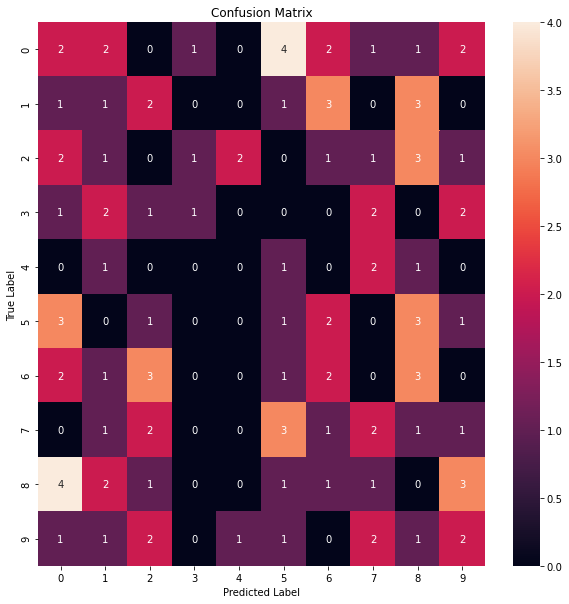

In [50]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
%matplotlib inline

# Reset the validation generator and evaluate the network after fine-tuning just the network head
print("[INFO] evaluating the model...")
test_data.reset()
plt.figure(figsize=(10,10))
predIdxs = model1.predict(test_data, steps = len(test_data))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_data.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_data.classes, predIdxs, target_names=test_data.class_indices.keys()))

In [51]:
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2

img_path = 'color_datasets/try2.png'



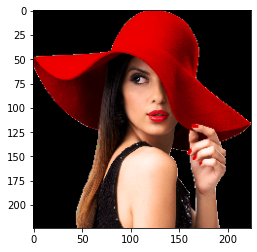

In [52]:
img = image.load_img(img_path, target_size=(224,224,3))
plt.imshow(img)

In [53]:
img = image.img_to_array(img)
img = img/225.0
img = img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [54]:
prediction = model1.predict(img)
prediction

array([[9.2449319e-09, 2.8521799e-07, 7.3195610e-05, 1.4188575e-07,
        1.3927392e-07, 3.1858133e-03, 9.9315804e-01, 3.5474536e-03,
        2.7041035e-05, 7.9905094e-06]], dtype=float32)

In [55]:
train_data.class_indices

{'black': 0,
 'blue': 1,
 'brown': 2,
 'green': 3,
 'grey': 4,
 'orange': 5,
 'red': 6,
 'violet': 7,
 'white': 8,
 'yellow': 9}

In [56]:
classes=('black','blue','brown','green','grey','orange','red','violet','white','yellow')

In [57]:
list_index=[0,1,2,3,4,5,6,7,8,9]

x=prediction

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]: 
      temp = list_index[i] 
      list_index[i]= list_index[j]
      list_index[j]=temp

print(list_index)  

[6, 7, 5, 2, 8, 9, 1, 3, 4, 0]


In [58]:
for i in range(10):
  print(classes[list_index[i]], ':', round(prediction[0][list_index[i]]*100,2), '%')

red : 99.32 %
violet : 0.35 %
orange : 0.32 %
brown : 0.01 %
white : 0.0 %
yellow : 0.0 %
blue : 0.0 %
green : 0.0 %
grey : 0.0 %
black : 0.0 %
